# Packages

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import astropy.io.fits   as pf
import os

# Paths

In [2]:
outputs_path = '../../LargeFilesResults/SEDFitting/'

# Reading the outputs

In [3]:
out_m150 = pd.read_csv(os.path.join(outputs_path, 'Batch150/outputs_ppxf_150_4350.csv'))
out_m200 = pd.read_csv(os.path.join(outputs_path, 'Batch200/outputs_ppxf_200_4350.csv'))
out_m230 = pd.read_csv(os.path.join(outputs_path, 'Batch230/outputs_ppxf_230_4350.csv'))

# Retrieving the data in the fits results

In [4]:
m150_path = '../../LargeFilesResults/SEDFitting/Batch150/'
m200_path = '../../LargeFilesResults/SEDFitting/Batch200/'
m230_path = '../../LargeFilesResults/SEDFitting/Batch230/'
fitted_glxs150 = os.listdir(m150_path)
fitted_glxs200 = os.listdir(m200_path)
fitted_glxs230 = os.listdir(m230_path)

In [5]:
# mdegree = 150 ------------------------------------------------------------------------------------------------------
nlist_150 = []
for i in range(len(fitted_glxs150)):
    if fitted_glxs150[i].split('.')[-1] != 'fits':
        continue
    else:
        nlist_150.append(fitted_glxs150[i])
nlist_150 = np.array(nlist_150)

# mdegree = 200 ------------------------------------------------------------------------------------------------------
nlist_200 = []
for i in range(len(fitted_glxs200)):
    if fitted_glxs200[i].split('.')[-1] != 'fits':
        continue
    else:
        nlist_200.append(fitted_glxs200[i])
nlist_200 = np.array(nlist_200)

# mdegree = 230 ------------------------------------------------------------------------------------------------------
nlist_230 = []
for i in range(len(fitted_glxs230)):
    if fitted_glxs230[i].split('.')[-1] != 'fits':
        continue
    else:
        nlist_230.append(fitted_glxs230[i])
nlist_230 = np.array(nlist_230)

In [6]:
missing_data150 = []
for i in range(nlist_150.size):
    header_temp = pf.open(os.path.join(m150_path, nlist_150[i]))[0].header
    cataid_temp = header_temp['CATAID']
    missing_data150.append([cataid_temp, header_temp['SPECID'], header_temp['SIGMA'], header_temp['VELOCITY']])
mdata150 = np.array(missing_data150)
mdata150 = pd.DataFrame(mdata150, columns=['CATAID', 'SPECID', 'SIGMA', 'VELOCITY']).astype({'CATAID': int, 
                                                                                             'SPECID': str, 
                                                                                             'SIGMA': float, 
                                                                                             'VELOCITY': float})

In [7]:
missing_data200 = []
for i in range(nlist_200.size):
    header_temp = pf.open(os.path.join(m200_path, nlist_200[i]))[0].header
    cataid_temp = header_temp['CATAID']
    missing_data200.append([cataid_temp, header_temp['SPECID'], header_temp['SIGMA'], header_temp['VELOCITY']])
mdata200 = np.array(missing_data200)
mdata200 = pd.DataFrame(mdata200, columns=['CATAID', 'SPECID', 'SIGMA', 'VELOCITY']).astype({'CATAID': int, 
                                                                                             'SPECID': str, 
                                                                                             'SIGMA': float, 
                                                                                             'VELOCITY': float})

In [8]:
missing_data230 = []
for i in range(nlist_230.size):
    header_temp = pf.open(os.path.join(m230_path, nlist_230[i]))[0].header
    cataid_temp = header_temp['CATAID']
    missing_data230.append([cataid_temp, header_temp['SPECID'], header_temp['SIGMA'], header_temp['VELOCITY']])
mdata230 = np.array(missing_data230)
mdata230 = pd.DataFrame(mdata230, columns=['CATAID', 'SPECID', 'SIGMA', 'VELOCITY']).astype({'CATAID': int, 
                                                                                             'SPECID': str, 
                                                                                             'SIGMA': float, 
                                                                                             'VELOCITY': float})

# Merging them into a single dataframe

In [9]:
mdegree150 = np.full_like(out_m150['CATAID'].values, "150")
mdegree200 = np.full_like(out_m200['CATAID'].values, "200")
mdegree230 = np.full_like(out_m230['CATAID'].values, "230")

In [10]:
out_m150.insert(loc=0, value=mdegree150, column='MDEGREE')
out_m200.insert(loc=0, value=mdegree200, column='MDEGREE')
out_m230.insert(loc=0, value=mdegree230, column='MDEGREE')

In [11]:
s2n = out_m230['S2N_runz']
chi = out_m230['CHI2_PPXF']

In [12]:
out_m150.insert(loc=6, value=s2n, column='S2N_runz')
out_m150.insert(loc=7, value=chi, column='CHI2_PPXF')
out_m150 = out_m150.merge(mdata150, on='CATAID', how='inner', validate='one_to_one')

In [13]:
out_m200.insert(loc=6, value=s2n, column='S2N_runz')
out_m200.insert(loc=7, value=chi, column='CHI2_PPXF')
out_m200 = out_m200.merge(mdata200, on='CATAID', how='inner', validate='one_to_one')

In [14]:
out_m230 = out_m230.merge(mdata230, on='CATAID', how='inner', validate='one_to_one')

In [15]:
frames = [out_m150, out_m200, out_m230]

In [16]:
new_df = pd.concat(frames, sort=False)

In [17]:
hue = []
for i in range(new_df['CATAID'].values.size):
    if new_df['S2N_runz'].values[i] >=10:
        hue.append('High S/N')
    else:
        hue.append('Low S/N')
hue = np.array(hue)

new_df.insert(loc=8, value=hue, column='S2N_hue')

# Plots

In [18]:
# %matplotlib notebook

palette  = ['#66c2a5', '#8da0cb']
figsize  = (20, 5)
fontsize = 15
idx_good = np.where(new_df['CHI2_PPXF'].values>=10)
idx_bad  = np.where(new_df['CHI2_PPXF'].values<10)
leg_loc  = 'lower left'

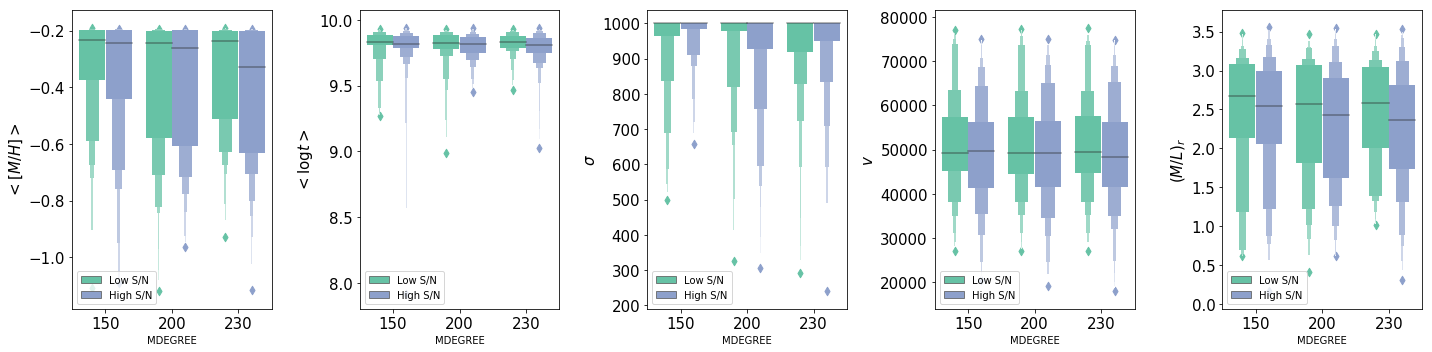

In [19]:
plt.subplots(figsize=figsize)

plt.subplot(1, 5, 1)
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['<[M/H]>'], palette=palette, hue=new_df['S2N_hue'],  saturation=1., 
              k_depth="proportion")
plt.ylabel("$<[M/H]>$", fontsize=fontsize)
plt.tick_params('both', labelsize=fontsize)
plt.legend(loc=leg_loc)

plt.subplot(1, 5, 2)
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['<logAge>'], palette=palette, hue=new_df['S2N_hue'], saturation=1., 
              k_depth="proportion")
plt.ylabel("$<\log t >$", fontsize=fontsize)
plt.tick_params('both', labelsize=fontsize)
plt.legend(loc=leg_loc)

plt.subplot(1, 5, 3)
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['SIGMA'], palette=palette, hue=new_df['S2N_hue'], saturation=1., 
              k_depth="proportion")
plt.ylabel("$\sigma$", fontsize=fontsize)
plt.tick_params('both', labelsize=fontsize)
plt.legend(loc=leg_loc)

plt.subplot(1, 5, 4)
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['VELOCITY'], palette=palette, saturation=1., hue=new_df['S2N_hue'],
              k_depth="proportion")
plt.ylabel("$v$", fontsize=fontsize)
plt.tick_params('both', labelsize=fontsize)
plt.legend(loc=leg_loc)

plt.subplot(1, 5, 5)
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['MASS2LIGHT_R'], palette=palette, saturation=1., hue=new_df['S2N_hue'], 
              k_depth="proportion")
plt.ylabel("$(M/L)_r$", fontsize=fontsize)
plt.tick_params('both', labelsize=fontsize)
plt.legend(loc=leg_loc)

plt.tight_layout()
plt.savefig(os.path.join(outputs_path, 'Analyses_mdegrees/ppxf_results.png'), dpi=100)
plt.savefig(os.path.join(outputs_path, 'Analyses_mdegrees/ppxf_results.pdf'), dpi=100)
plt.show()

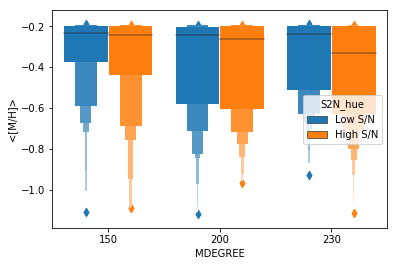

In [20]:
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['<[M/H]>'], hue=new_df['S2N_hue'], saturation=1., k_depth="proportion")
plt.savefig(os.path.join(outputs_path, 'Analyses_mdegrees/lvplot_metallicity.png'))
plt.show()

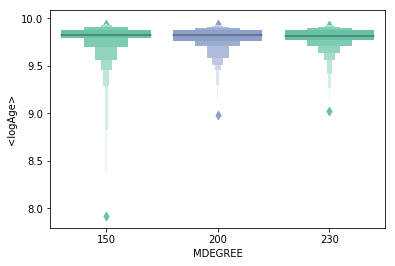

In [21]:
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['<logAge>'], palette=palette, saturation=1., k_depth="proportion")
plt.savefig(os.path.join(outputs_path, 'Analyses_mdegrees/lvplot_age.png'))
plt.show()

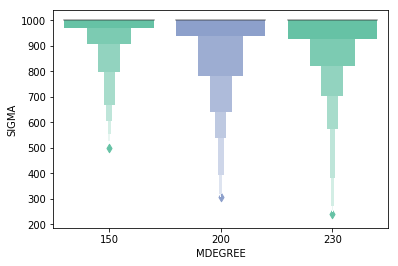

In [22]:
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['SIGMA'], palette=palette, saturation=1., k_depth="proportion")
plt.savefig(os.path.join(outputs_path, 'Analyses_mdegrees/lvplot_sigma.png'))
plt.show()

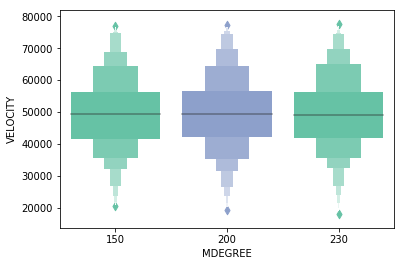

In [23]:
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['VELOCITY'], palette=palette, saturation=1., k_depth="proportion")
plt.savefig(os.path.join(outputs_path, 'Analyses_mdegrees/lvplot_sigmaI.png'))
plt.show()

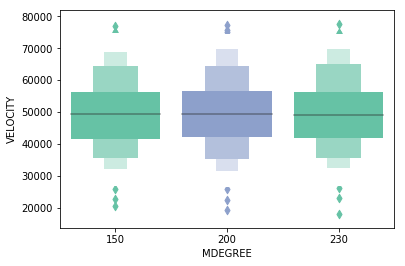

In [24]:
sns.boxenplot(x=new_df['MDEGREE'], y=new_df['VELOCITY'], palette=palette, saturation=1., k_depth="trustworthy")
plt.savefig(os.path.join(outputs_path, 'Analyses_mdegrees/lvplot_sigmaII.png'))
plt.show()

In [25]:
split = np.split(new_df, 3)

In [26]:
desc01, desc02, desc03 = split[0].describe(), split[1].describe(), split[2].describe()

In [27]:
desc01.to_csv('./summ_m150.csv')
desc02.to_csv('./summ_m200.csv')
desc03.to_csv('./summ_m230.csv')

In [29]:
list_hs2n = list(new_df[new_df['S2N_hue']=='High S/N']['SPECID'].values)

In [31]:
cp_list = []
for i in range(len(list_hs2n)):
    cp_list.append(str(list_hs2n[i]+'.fit'))
cp_list 

['G09_Y1_ES2_264.fit',
 'G12_Y1_CND1_270.fit',
 'G12_Y1_EN1_389.fit',
 'G15_Y1_FS1_299.fit',
 'G15_Y1_BN2_135.fit',
 'G15_Y1_IN1_053.fit',
 'G12_Y1_DX2_024.fit',
 'G12_Y1_AX2_177.fit',
 'G12_Y1_FX2_195.fit',
 'G12_Y2_002_094.fit',
 'G12_Y1_EX1_378.fit',
 'G12_Y1_FX2_235.fit',
 'G15_Y1_CN2_199.fit',
 'G15_Y1_HN2_203.fit',
 'G09_Y1_GN1_193.fit',
 'G09_Y1_EN2_363.fit',
 'G15_Y4_242_212.fit',
 'G09_Y1_CX2_380.fit',
 'G09_Y1_CX2_228.fit',
 'G09_Y4_213_108.fit',
 'G09_Y4_207_183.fit',
 'G09_Y4_225_335.fit',
 'G09_Y1_BS2_081.fit',
 'G09_Y1_ES1_152.fit',
 'G15_Y1_AX1_145.fit',
 'G09_Y4_236_331.fit',
 'G09_Y4_212_236.fit',
 'G12_Y1_BS1_391.fit',
 'G12_Y1_DS1_203.fit',
 'G12_Y1_HS2_311.fit',
 'G15_Y1_BS2_078.fit',
 'G15_Y1_FS2_177.fit',
 'G12_Y1_ND4_160.fit',
 'G12_Y1_END1_096.fit',
 'G12_Y1_ND5_067.fit',
 'G15_Y1_CS1_013.fit',
 'G12_Y1_ND4_288.fit',
 'G12_Y1_GN1_363.fit',
 'G15_Y1_CN1_125.fit',
 'G15_Y1_EN2_054.fit',
 'G12_Y1_AS2_331.fit',
 'G12_Y1_GS2_373.fit',
 'G12_Y1_ES1_298.fit',
 'G12_Y1_

In [36]:
from shutil import copyfile

In [37]:
for i in range(len(cp_list)):
    copyfile(os.path.join('../../../../GAMADR3_SPECTRA/DATABASE/', cp_list[i]), 
             os.path.join('/home/mlldantas/Downloads/Lixo/', cp_list[i]))